In [ ]:
# importing libraries
import cv2, time
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

## 1)

### c)

In [ ]:
def strip_img(width=2, shape=(200,200)):
  img = np.zeros(shape)
  M,N = shape
  strip = 'w'

  for i in range(0, N, width):
    if strip == 'b':
      img[:,i:(i+width)]=0
      strip='w'
    else:
      img[:,i:(i+width)]=255
      strip='b'

  return img

In [ ]:
# Magnitude spectrums for 1, 2 and 4 pixels
img1pix = strip_img(width = 1)
magnitude_spectrum1pix = np.abs(np.fft.fftshift(np.fft.fft2(img1pix)))

img2pix = strip_img()
magnitude_spectrum2pix = np.abs(np.fft.fftshift(np.fft.fft2(img2pix)))

img4pix = strip_img(width = 4)
magnitude_spectrum4pix = np.abs(np.fft.fftshift(np.fft.fft2(img4pix)))

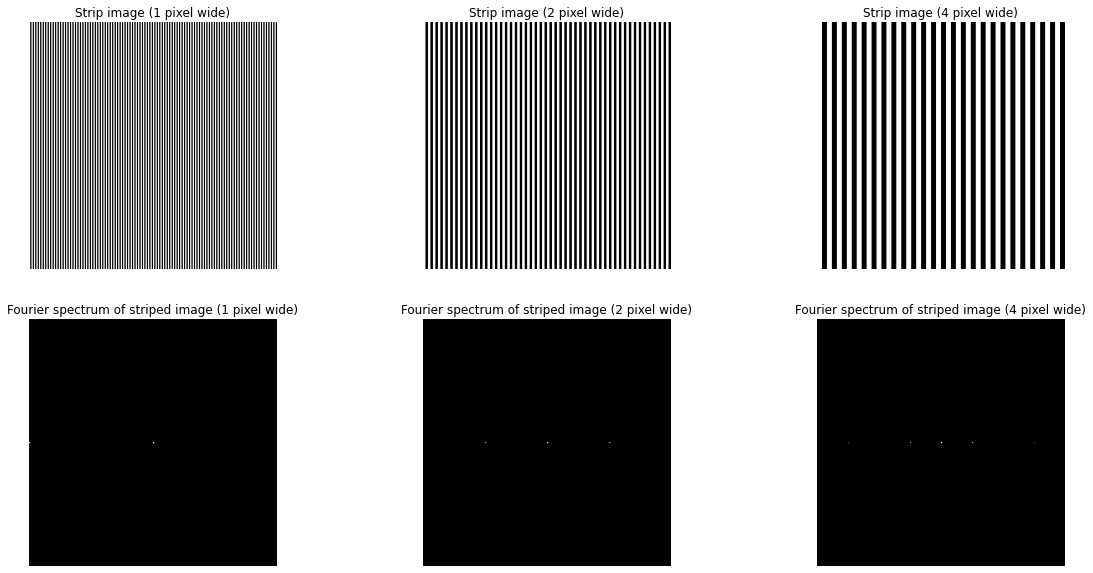

In [ ]:
fig=plt.figure()

fig.add_subplot(2, 3, 1)
plt.imshow(img1pix,cmap="gray")
plt.title("Strip image (1 pixel wide)")
plt.axis('off')
fig.add_subplot(2,3,2)
plt.imshow(img2pix,cmap="gray")
plt.title("Strip image (2 pixel wide)")
plt.axis('off')
fig.add_subplot(2,3,3)
plt.imshow(img4pix,cmap="gray")
plt.title("Strip image (4 pixel wide)")
plt.axis('off')
fig.add_subplot(2,3,4)
plt.imshow(magnitude_spectrum1pix,cmap="gray")
plt.title("Fourier spectrum of striped image (1 pixel wide)")
plt.axis('off')
fig.add_subplot(2,3,5)
plt.imshow(magnitude_spectrum2pix,cmap="gray")
plt.title("Fourier spectrum of striped image (2 pixel wide)")
plt.axis('off')
fig.add_subplot(2,3,6)
plt.imshow(magnitude_spectrum4pix,cmap="gray")
plt.title("Fourier spectrum of striped image (4 pixel wide)")
plt.axis('off')
plt.show()

In [ ]:
M,N = img2pix.shape
magnitude_spectrum1pix[M//2, N//2], magnitude_spectrum4pix[M//2, N//2]

(5100000.0, 5100000.0)

-  Subplots at (1,3) and (2,3) are the required striped image (of width 4 
pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above

- The components of the fourier spectrum are limited only to the x-axis since the intensity of the pixel values change while moving along the x-axis from one pixel to another. The change in frequency along the y-axis is zero.

- Subplots at (1,1) and (2,1) are the required striped image (of width 4 pixels) and its corresponding fourier spectrum, including only the dc term and the two highest-value frequency terms, which correspond to the two spikes in the spectrum above

- Dc terms in both the images (with width 1 pixel and 4 pixels) are the same since the central dc component is nothing but the average brightness of the image which is essentially the same for both cases.

## 2)

In [ ]:
img=cv2.imread("moon.jpg",0)

### a)

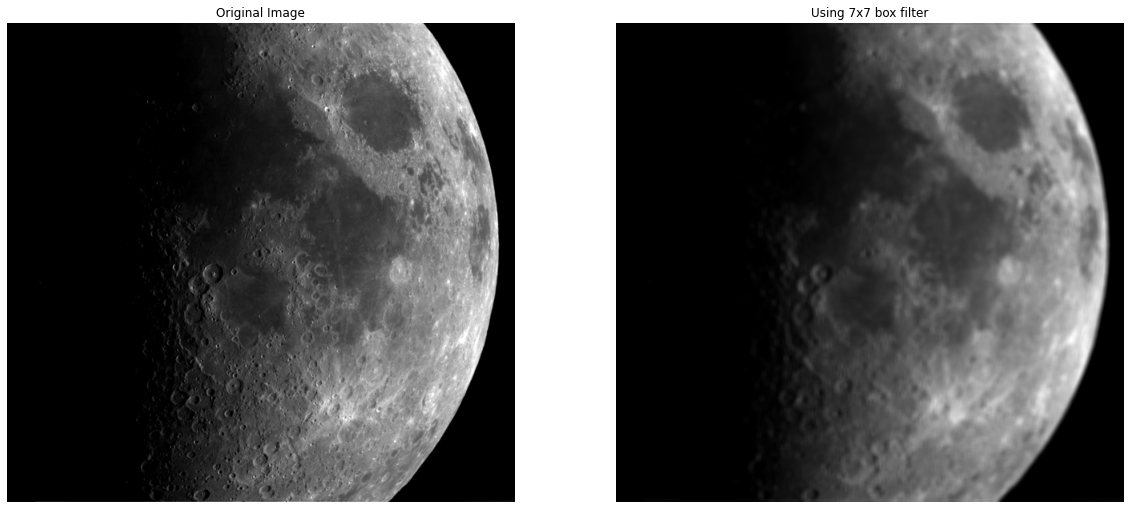

In [ ]:
box = np.ones((7,7))/(7*7)
box_img=cv2.filter2D(img, -1, box)

fig=plt.figure()

fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(box_img,cmap="gray")
plt.title("Using 7x7 box filter")
plt.axis('off')
plt.show()

Box filter smooths and blurs the original image. The edges aren't clear.

### b)

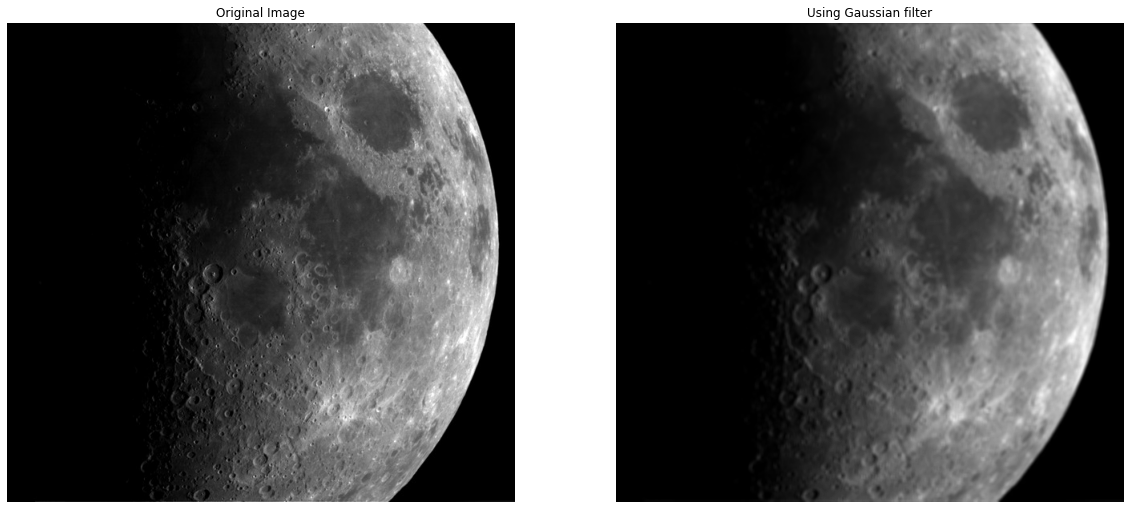

In [ ]:
temp = cv2.getGaussianKernel(5,10)
gauss = temp*temp.T
gauss_img=cv2.filter2D(img, -1, gauss)

fig=plt.figure()

fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(gauss_img,cmap="gray")
plt.title("Using Gaussian filter")
plt.axis('off')
plt.show()

Gaussian filter also blurs the image, but it brings the blurring effect more uniformy as compared to box filter.

### c)

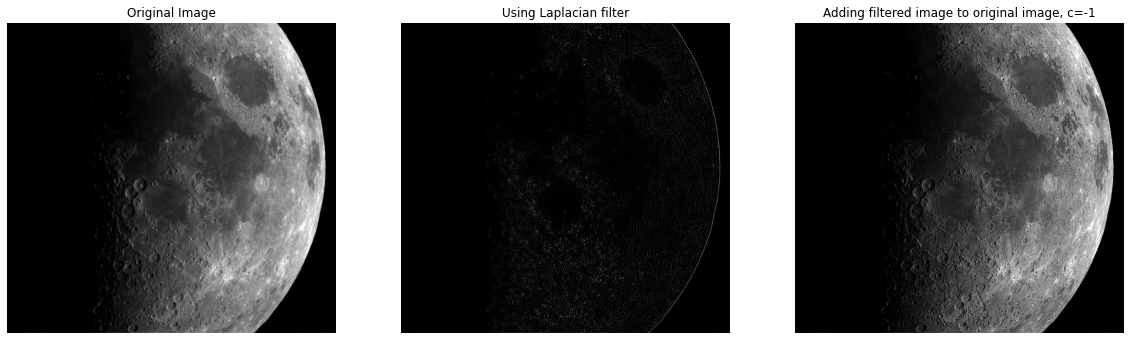

In [ ]:
lap=np.array([[0, 1, 0],[1,-4, 1],[0, 1, 0]])
lap_img=cv2.filter2D(img, -1, lap)
res_img=cv2.subtract(img,lap_img)
fig=plt.figure()

fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,3,2)
plt.imshow(lap_img,cmap="gray")
plt.title("Using Laplacian filter")
plt.axis('off')
fig.add_subplot(1,3,3)
plt.imshow(res_img,cmap="gray")
plt.title("Adding filtered image to original image, c=-1")
plt.axis('off')
plt.show()

Laplacian filter helps to detect the edges in an image. Using appropriate addition (c=-1, as negative center kernel has been used) of original image and filtered image, edges are enhanced.

### d)

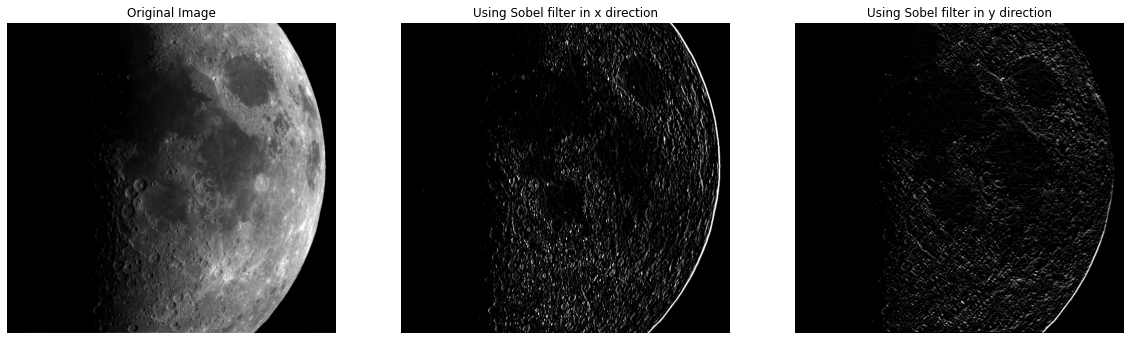

In [ ]:
# Sobel in x-direction
sobel_x = cv2.flip(np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]]),-1)
sobel_ximg=cv2.filter2D(img, -1, sobel_x)
# Sobel in y-direction
sobel_y = cv2.flip(np.array([[-1,-2,-1],[0, 0, 0],[1, 2, 1]]),-1)
sobel_yimg=cv2.filter2D(img, -1, sobel_y)
fig=plt.figure()

fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,3,2)
plt.imshow(sobel_ximg,cmap="gray")
plt.title("Using Sobel filter in x direction")
plt.axis('off')
fig.add_subplot(1,3,3)
plt.imshow(sobel_yimg,cmap="gray")
plt.title("Using Sobel filter in y direction")
plt.axis('off')
plt.show()

Sobel filter helps in detecting the edges. The filter used in X-direction (or Y-direction) makes the  the edges in the X-direction (or Y-direction) prominent.

## 3)

### a)

In [ ]:
# Function to create image of size 100x100 with a white rectangle at the center
def make_rect(x,y):
  img = np.zeros((100,100), dtype = np.uint8)
  M,N = img.shape
  c_row = M//2
  c_col = N//2
  rec_m, rec_n = x,y
  # creating rectangle in the middle
  img[(c_row - (rec_m//2)): (c_row+(rec_m//2)), 
      (c_col - (rec_n//2)): (c_col+(rec_n//2))] = 255
    
  return img

In [ ]:
def spectrum(x,y):
  img = make_rect(x,y)
  dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
  dft_shift = np.fft.fftshift(dft)

  magnitude_spectrum, phase_spectrum = cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1])

  magnitude_spectrum = 20 * np.log(1+magnitude_spectrum)
  power_spectrum = np.power(magnitude_spectrum,2) 
  fig=plt.figure()

  fig.add_subplot(1, 4, 1)
  plt.imshow(img,cmap="gray")
  plt.title("Image")
  plt.axis('off')
  fig.add_subplot(1,4,2)
  plt.imshow(magnitude_spectrum,cmap="gray")
  plt.title("Magnitude Spectrum")
  plt.axis('off')
  fig.add_subplot(1,4,3)
  plt.imshow(phase_spectrum,cmap="gray")
  plt.title("Phase Spectrum")
  plt.axis('off')
  fig.add_subplot(1,4,4)
  plt.imshow(power_spectrum,cmap="gray")
  plt.title("Power Spectrum")
  plt.axis('off')
  plt.show()

Enter the length of rectangle 20
Enter breadth of rectangle 20


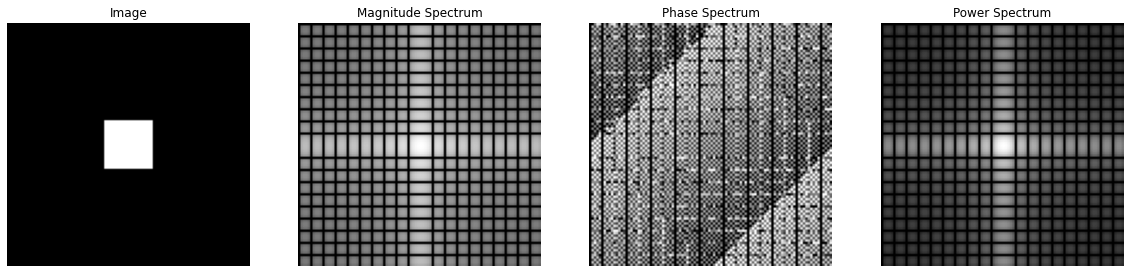

In [ ]:
x=int(input("Enter the length of rectangle "))
y=int(input("Enter breadth of rectangle "))
spectrum(x,y)

### b)

Enter the length of rectangle 10
Enter breadth of rectangle 10


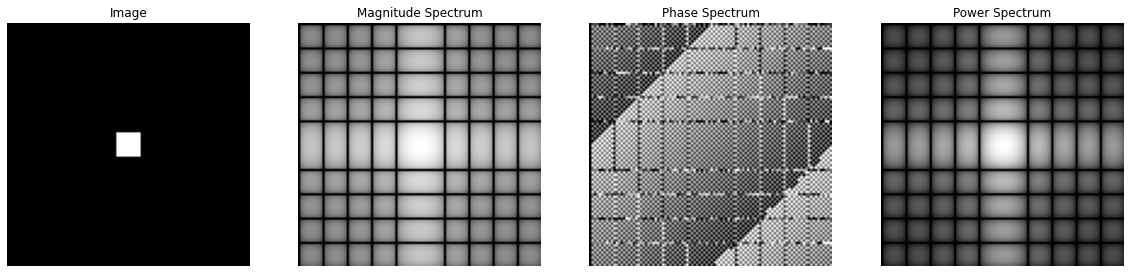

In [ ]:
x=int(input("Enter the length of rectangle "))
y=int(input("Enter breadth of rectangle "))
spectrum(x,y)

Enter the length of rectangle 20
Enter breadth of rectangle 20


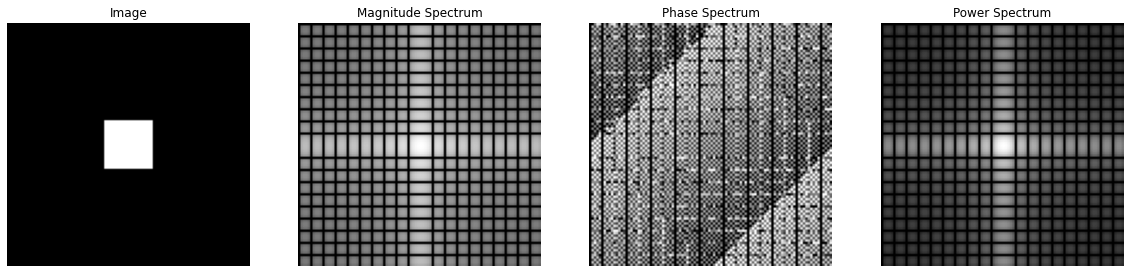

In [ ]:
x=int(input("Enter the length of rectangle "))
y=int(input("Enter breadth of rectangle "))
spectrum(x,y)

Enter the length of rectangle 30
Enter breadth of rectangle 30


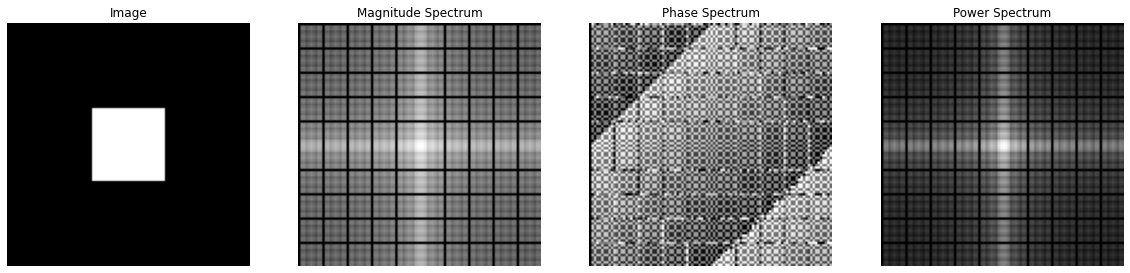

In [ ]:
x=int(input("Enter the length of rectangle "))
y=int(input("Enter breadth of rectangle "))
spectrum(x,y)

**Magnitude Spectrum:** Expanding the dimensions of the white rectangle results in a wider peak in the magnitude spectrum, whereas reducing its dimensions produces a more distinct peak. The reason behind this is that a larger white rectangle encompasses more high-frequency components, which expand the spectral content across a broader frequency range. Conversely, a smaller white rectangle comprises fewer high-frequency components, creating a more pointed peak in the magnitude spectrum.

**Phase Spectrum:** Altering the dimensions of the white rectangle does not significantly impact the phase spectrum. The phase spectrum is primarily determined by how the image is arranged spatially, and the size of the white rectangle has minimal sway over it.

**Power Spectrum:** The power spectrum is directly proportional to the square of the magnitude spectrum. Thus, expanding the dimensions of the white rectangle results in a more widely dispersed power spectrum, while reducing its dimensions leads to a more focused power spectrum. These modifications align with the variations observed in the magnitude spectrum.

The size of the white rectangle impacts the spectral images by altering the spatial frequency composition of the image. When the white rectangle is enlarged, it includes more high-frequency components, while a reduction in its size leads to fewer high-frequency components being included.

## 4)

In [ ]:
img=cv2.imread("ricegrains.jpg",0)

### a)

In [ ]:
kernel_sizes = [3,5,7]
box=[]
gauss=[]
med=[]
for i in kernel_sizes:
  box.append(cv2.blur(img , (i,i)))
  gauss.append(cv2.GaussianBlur(img, (i,i), 1.5))
  med.append(cv2.medianBlur(img, i))

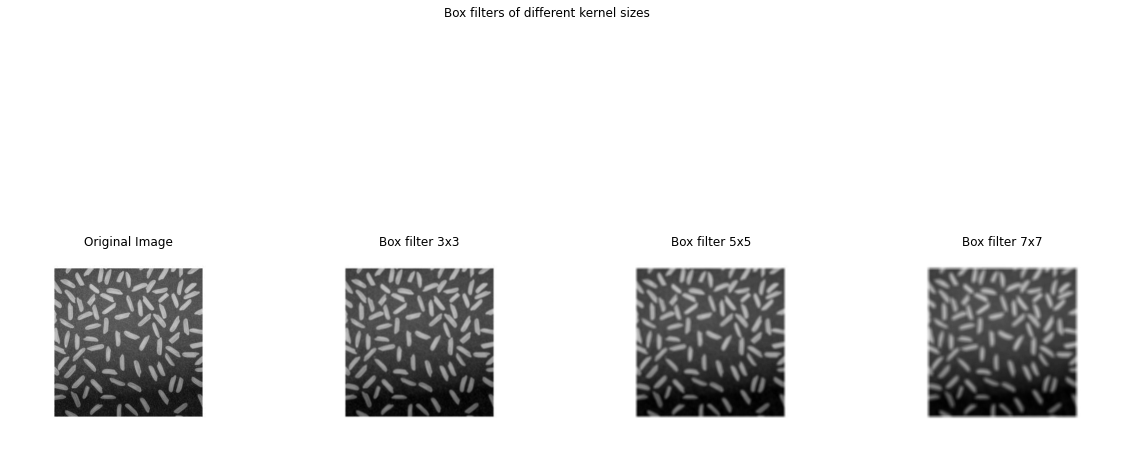

In [ ]:
fig=plt.figure()

fig.add_subplot(1, 4, 1)
plt.suptitle("Box filters of different kernel sizes")
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,4,2)
plt.imshow(box[0],cmap="gray")
plt.title("Box filter 3x3")
plt.axis('off')
fig.add_subplot(1,4,3)
plt.imshow(box[1],cmap="gray")
plt.title("Box filter 5x5")
plt.axis('off')
fig.add_subplot(1,4,4)
plt.imshow(box[2],cmap="gray")
plt.title("Box filter 7x7")
plt.axis('off')
plt.show()

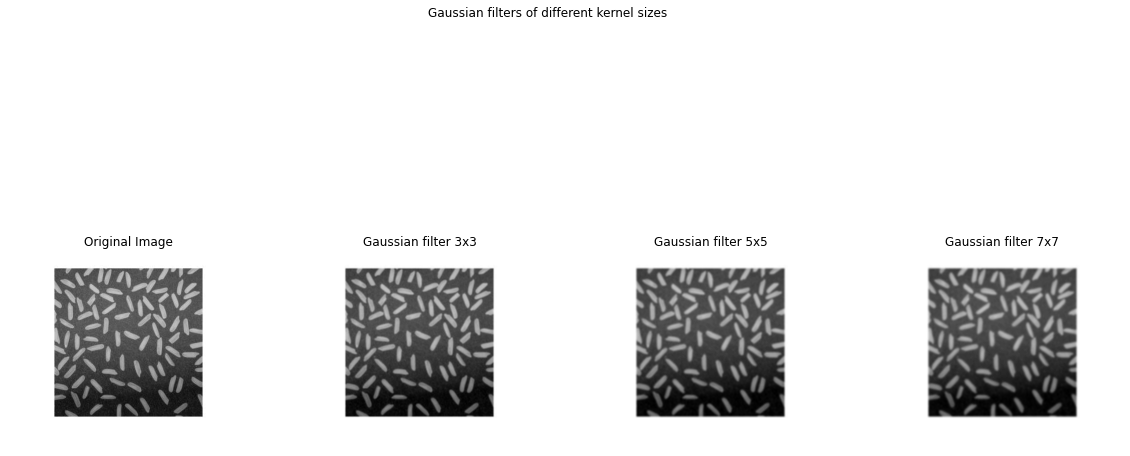

In [ ]:
fig=plt.figure()

fig.add_subplot(1, 4, 1)
plt.suptitle("Gaussian filters of different kernel sizes")
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,4,2)
plt.imshow(gauss[0],cmap="gray")
plt.title("Gaussian filter 3x3")
plt.axis('off')
fig.add_subplot(1,4,3)
plt.imshow(gauss[1],cmap="gray")
plt.title("Gaussian filter 5x5")
plt.axis('off')
fig.add_subplot(1,4,4)
plt.imshow(gauss[2],cmap="gray")
plt.title("Gaussian filter 7x7")
plt.axis('off')
plt.show()

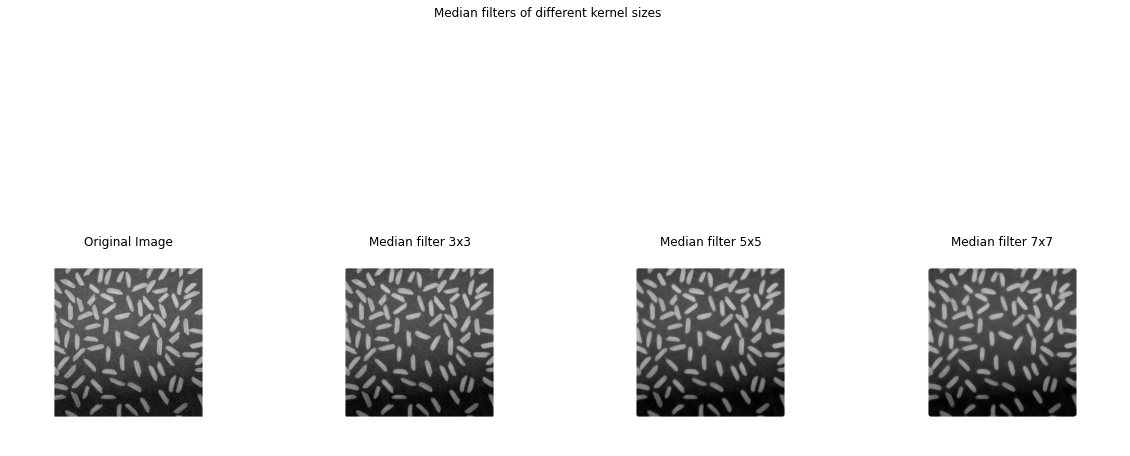

In [ ]:
fig=plt.figure()

fig.add_subplot(1, 4, 1)
plt.suptitle("Median filters of different kernel sizes")
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,4,2)
plt.imshow(med[0],cmap="gray")
plt.title("Median filter 3x3")
plt.axis('off')
fig.add_subplot(1,4,3)
plt.imshow(med[1],cmap="gray")
plt.title("Median filter 5x5")
plt.axis('off')
fig.add_subplot(1,4,4)
plt.imshow(med[2],cmap="gray")
plt.title("Median filter 7x7")
plt.axis('off')
plt.show()

### b)

In [ ]:
# Function to apply Butterworth Lowpass Filter to image
def butterworth_lowpass(img, radius, n):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/radius)**(2*n)))
            
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

In [ ]:
# Function to apply Gaussian Lowpass Filter to image
def gaussian_lowpass(img, radius):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
    
  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(radius**2))))
            
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out.astype(np.uint8)

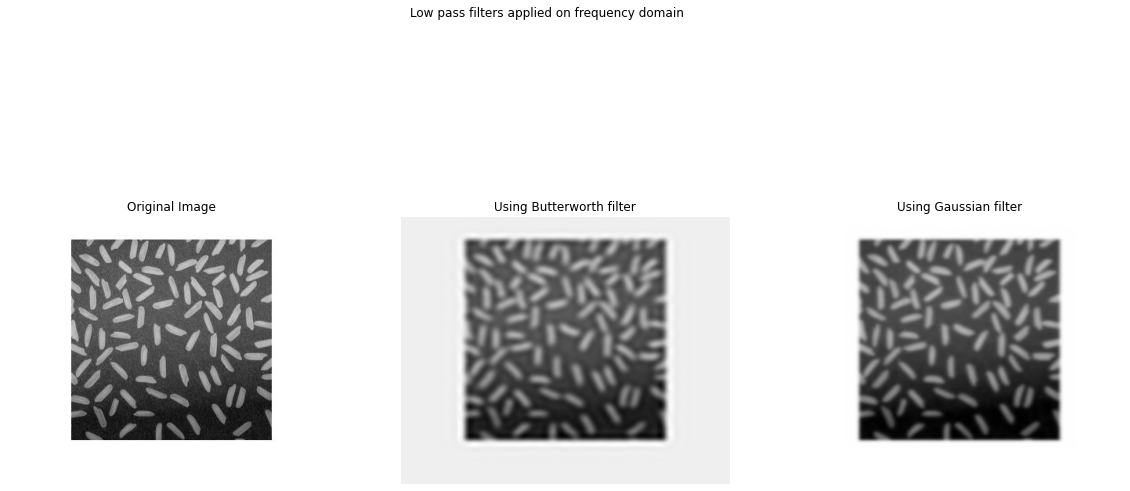

In [ ]:
butterworth_img = butterworth_lowpass(img, 30, 4)
gauss_img = gaussian_lowpass(img, 30)
fig=plt.figure()

fig.add_subplot(1, 3, 1)
plt.suptitle("Low pass filters applied on frequency domain")
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,3,2)
plt.imshow(butterworth_img,cmap="gray")
plt.title("Using Butterworth filter")
plt.axis('off')
fig.add_subplot(1,3,3)
plt.imshow(gauss_img,cmap="gray")
plt.title("Using Gaussian filter")
plt.axis('off')
plt.show()

## 5)

In [ ]:
img=cv2.imread("tigerbw.jpg",0)

### a)

In [ ]:
K=1
temp = cv2.getGaussianKernel(5, 10)
gauss = temp * temp.T
blurred_img = cv2.filter2D(img, -1, gauss)
mask = img-blurred_img
unsharped_img = img + K*mask

# Sobel Edge Detector
sob_x = cv2.filter2D(img, -1, sobel_x)
sob_y = cv2.filter2D(img, -1, sobel_y)

# Laplace Edge Detector
lap_img = cv2.filter2D(img, -1, lap)

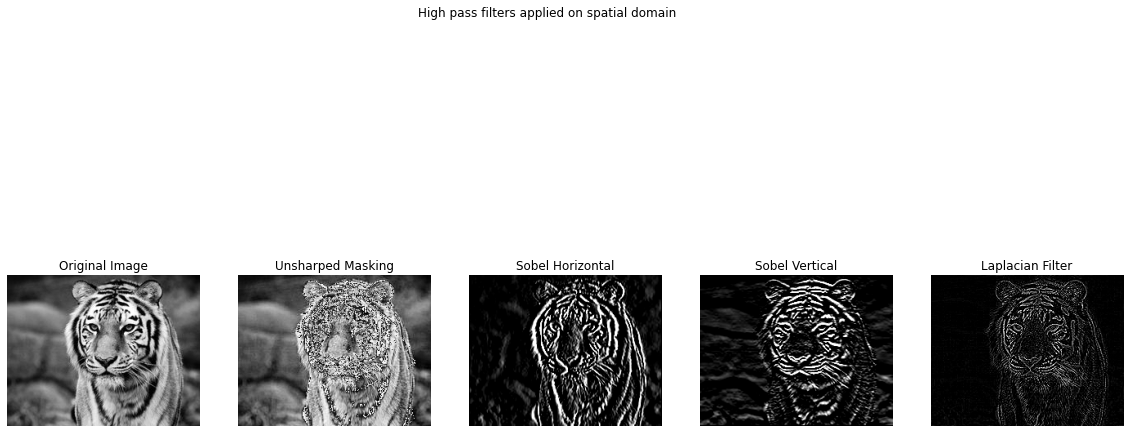

In [ ]:
fig=plt.figure()

fig.add_subplot(1, 5, 1)
plt.suptitle("High pass filters applied on spatial domain")
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,5,2)
plt.imshow(unsharped_img,cmap="gray")
plt.title("Unsharped Masking")
plt.axis('off')
fig.add_subplot(1,5,3)
plt.imshow(sob_x,cmap="gray")
plt.title("Sobel Horizontal")
plt.axis('off')
fig.add_subplot(1,5,4)
plt.imshow(sob_y,cmap="gray")
plt.title("Sobel Vertical")
plt.axis('off')
fig.add_subplot(1,5,5)
plt.imshow(lap_img,cmap="gray")
plt.title("Laplacian Filter")
plt.axis('off')
plt.show()

### b)

In [ ]:
def butterworth_highpass(img, radius, n):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = np.sqrt((i-cx)**2 + (j-cy)**2)
      H[i,j] = 1/(1+((d/radius)**(2*n)))
  H = (1 - H)
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out

In [ ]:
def gaussian_highpass(img, radius):
  fshift = np.fft.fftshift(np.fft.fft2(img))
  M,N = img.shape
  out = np.zeros((M,N))
  cx = round(M/2)
  cy = round(N/2)
  H = np.zeros((M,N))
  
  for i in range(M):
    for j in range(N):
      d = (i-cx)**2 + (j-cy)**2
      H[i,j] = np.exp(-(d/(2*(radius**2))))
    
  H = 1 - H
  out_fourier = fshift * H
  out = np.abs(np.fft.ifft2(out_fourier))
  return out.astype(np.uint8)

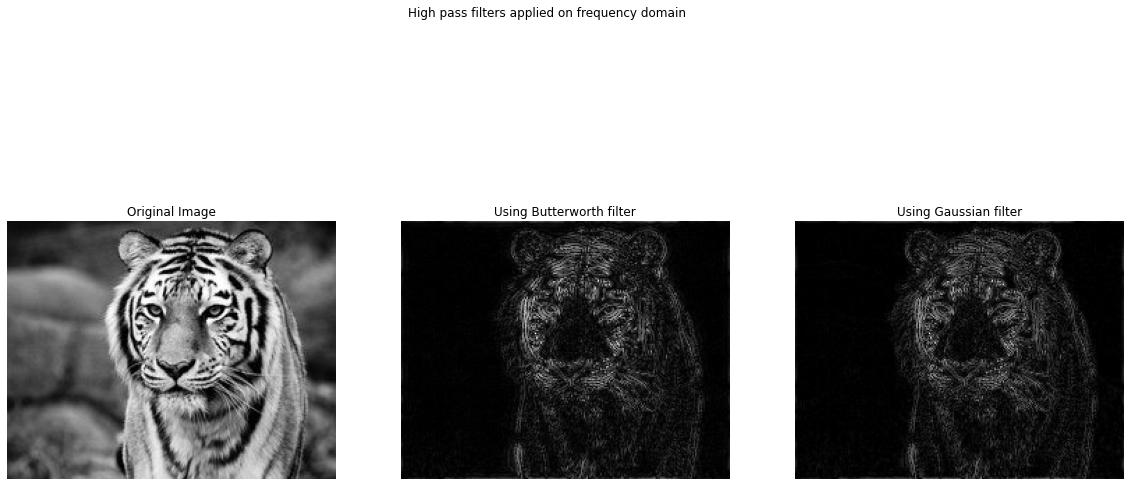

In [ ]:
butterworth_img = butterworth_highpass(img, 30, 4)
gauss_img = gaussian_highpass(img, 30)
fig=plt.figure()

fig.add_subplot(1, 3, 1)
plt.suptitle("High pass filters applied on frequency domain")
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,3,2)
plt.imshow(butterworth_img,cmap="gray")
plt.title("Using Butterworth filter")
plt.axis('off')
fig.add_subplot(1,3,3)
plt.imshow(gauss_img,cmap="gray")
plt.title("Using Gaussian filter")
plt.axis('off')
plt.show()

## 6)

In [ ]:
img=cv2.imread("cameraman.jpg",0)

### a)

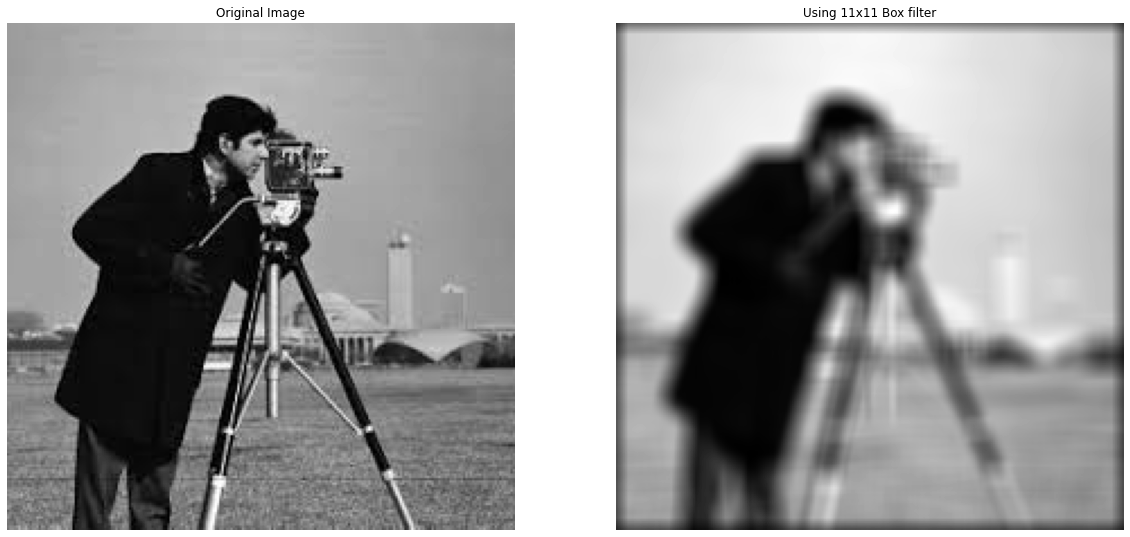

In [ ]:
box_filter = ((1/(11*11))*np.ones((11,11))).astype(np.float32)

start_time = time.time()
box_img = convolve2d(img, box_filter, 'same')
end_time = time.time()

t1 = end_time-start_time

fig=plt.figure()

fig.add_subplot(1, 2, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,2,2)
plt.imshow(box_img,cmap="gray")
plt.title("Using 11x11 Box filter")
plt.axis('off')
plt.show()

### b)

In [ ]:
def pad_img(img, new_shape):
  M,N = img.shape
  new_M, new_N = new_shape
  padded_img = np.zeros((new_M, new_N))
  padded_img[:M,:N] = img
  return padded_img

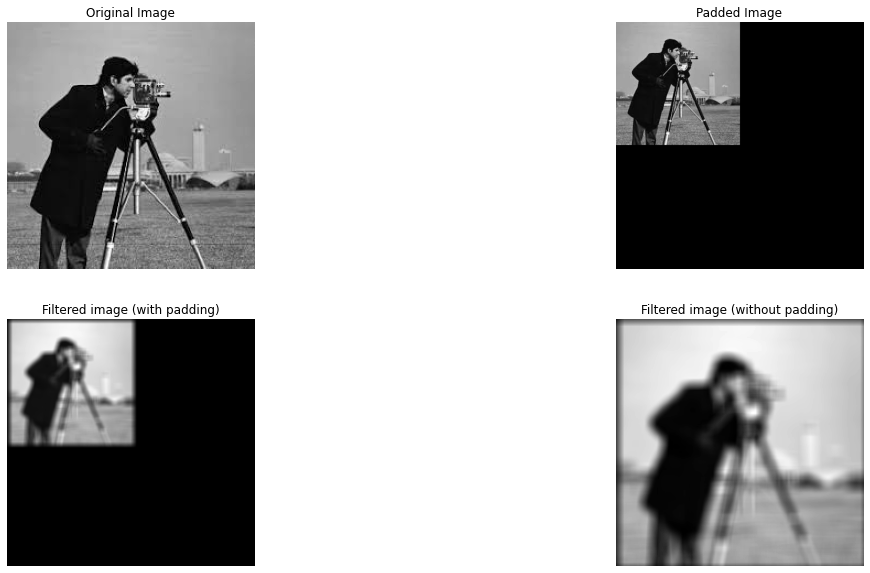

In [ ]:
M, N = img.shape
P = 2*M
Q = 2*N

# Padding image and filter
padded_img = pad_img(img, new_shape = (P,Q))
padded_filter = pad_img(box_filter, (P,Q))

# Fourier transform of image and kernel
image_fft =  np.fft.fftshift(np.fft.fft2(padded_img))
kernel_fft = np.fft.fftshift(np.fft.fft2(padded_filter))

start_time = time.time()
conv_fourier = np.multiply(image_fft, kernel_fft)
end_time = time.time()
t2 = end_time-start_time

transformed_spatial = np.abs(np.fft.ifft2(conv_fourier)).astype(np.uint8)
transformed_spatial_cut = transformed_spatial[3:3+M,3:3+N]

fig=plt.figure()

fig.add_subplot(2, 2, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(2,2,2)
plt.imshow(padded_img,cmap="gray")
plt.title("Padded Image")
plt.axis('off')
fig.add_subplot(2,2,3)
plt.imshow(transformed_spatial,cmap="gray")
plt.title("Filtered image (with padding)")
plt.axis('off')
fig.add_subplot(2,2,4)
plt.imshow(transformed_spatial_cut,cmap="gray")
plt.title("Filtered image (without padding)")
plt.axis('off')
plt.show()

### c)

In [ ]:
print("Time required for 11x11 average filter in spatial domain is ",t1)
print("\nTime required for enhancement in frequency domain is ",t2)

Time required for 11x11 average filter in spatial domain is  0.05973625183105469

Time required for enhancement in frequency domain is  0.0012974739074707031


In [ ]:
t1/t2

46.0404263138552

Clearly applying filter in frequency domain is a lot faster than applying in spatial domain.

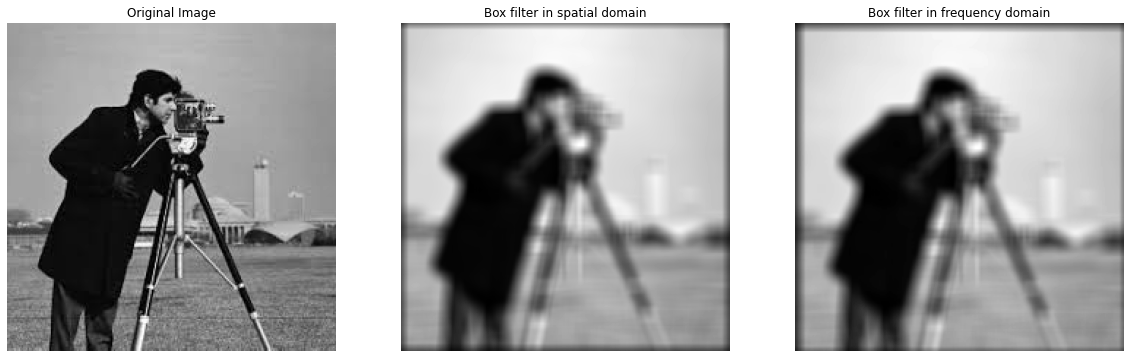

In [ ]:
fig=plt.figure()

fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap="gray")
plt.title("Original Image")
plt.axis('off')
fig.add_subplot(1,3,2)
plt.imshow(box_img,cmap="gray")
plt.title("Box filter in spatial domain")
plt.axis('off')
fig.add_subplot(1,3,3)
plt.imshow(transformed_spatial_cut,cmap="gray")
plt.title("Box filter in frequency domain")
plt.axis('off')
plt.show()